In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Suicide_Detection.csv', encoding = "utf-8")

In [3]:
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [4]:
data.shape

(232074, 3)

suicide        116037
non-suicide    116037
Name: class, dtype: int64
suicide        0.5
non-suicide    0.5
Name: class, dtype: float64


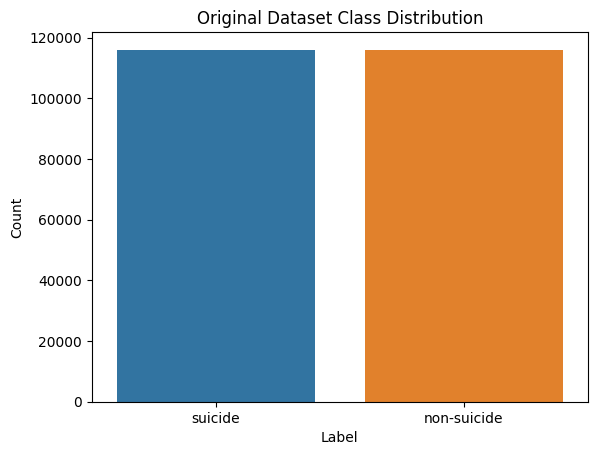

In [5]:
# Check class distribution
print(data['class'].value_counts())
print(data['class'].value_counts(normalize=True))

sns.countplot(x=data['class'])
plt.title('Original Dataset Class Distribution')
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [6]:
data.drop(['Unnamed: 0'],axis=1)

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


In [7]:
display(data.iloc[27]['text'])

"I think today may be my last.Everything's becoming too overwhelming and once it's late enough into the night I think it would be enough to go and finally end this miserable life of mine. I have a plan that works, if a certain friend doesn't call again. But I don't know if I'll be able to actually move.. I don't know what I want anymore but dying fixes everything, like this pain in my chest... And everything else.\n\nDying would fix everything, and I'd stop being such a nuisance and a past to the people I care about.\n\nI can't waste anyone's time if I'm dead.\n\n&amp;#x200B;\n\nI think once the time is right, I'll go."

In [8]:
import sys  

In [9]:
import contractions
data["clean_msg"]=data['text'].apply(lambda x: ' '.join(contractions.fix(word) for word in x.split()))

In [10]:
data.head()

,Unnamed: 0,text,class,clean_msg
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I do not get affected by compliment...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,Finally 2020 is almost over... So I can never ...
3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me i am crying so hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,"I am so lostHello, my name is Adam (16) and I ..."


In [11]:
from unidecode import unidecode
data['clean_msg'].apply(unidecode)

0         Ex Wife Threatening SuicideRecently I left my ...
1         Am I weird I do not get affected by compliment...
2         Finally 2020 is almost over... So I can never ...
3               i need helpjust help me i am crying so hard
4         I am so lostHello, my name is Adam (16) and I ...
                                ...                        
232069    If you do not like rock then your not going to...
232070    You how you can tell i have so many friends an...
232071    pee probably tastes like salty tea!! can someo...
232072    The usual stuff you find hereI'm not posting t...
232073    I still have not beaten the first boss in Holl...
Name: clean_msg, Length: 232074, dtype: object

In [12]:
data.head()

,Unnamed: 0,text,class,clean_msg
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I do not get affected by compliment...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,Finally 2020 is almost over... So I can never ...
3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me i am crying so hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,"I am so lostHello, my name is Adam (16) and I ..."


In [13]:
data['clean_msg']= data['clean_msg'].apply(lambda x:x.lower())
data.head()

,Unnamed: 0,text,class,clean_msg
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently i left my ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,am i weird i do not get affected by compliment...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 is almost over... so i can never ...
3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me i am crying so hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,"i am so losthello, my name is adam (16) and i ..."


In [14]:

#Removing URL,Symbol,digit,Special Char coz they don't have any meaning

import re
url_regex = r'http\S+|www.\S+'
symbol_regex = r'[$-/:-?{-~!"^_`\[\]]'
digit_regex = r'\d'
special_char_regex = r'[^\w\s]'

In [15]:
data['clean_msg'] = data['clean_msg'].apply(lambda x: re.sub(url_regex, '', x))
data['clean_msg'] = data['clean_msg'].apply(lambda x: re.sub(symbol_regex, '', x))
data['clean_msg'] = data['clean_msg'].apply(lambda x: re.sub(digit_regex, '', x))
data['clean_msg'] = data['clean_msg'].apply(lambda x: re.sub(special_char_regex, '', x))

In [16]:
data.head()

,Unnamed: 0,text,class,clean_msg
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently i left my ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,am i weird i do not get affected by compliment...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally is almost over so i can never hear h...
3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me i am crying so hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,i am so losthello my name is adam and i have ...


In [17]:
#removing extra whitespaces as it might interfere with tekenization
data['clean_msg'] = data['clean_msg'].str.strip().str.replace(r'\s{2,}', ' ')
# converting words like goooood to good
data['clean_msg'] = data['clean_msg'].str.strip().str.replace(r'\b(\w+)(\w)\2{2,}\b',r'\1\2')

C:\Users\Prashant\AppData\Local\Temp\ipykernel_17096\918333207.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_msg'] = data['clean_msg'].str.strip().str.replace(r'\s{2,}', ' ')
C:\Users\Prashant\AppData\Local\Temp\ipykernel_17096\918333207.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_msg'] = data['clean_msg'].str.strip().str.replace(r'\b(\w+)(\w)\2{2,}\b',r'\1\2')


In [18]:
data.head()

,Unnamed: 0,text,class,clean_msg
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently i left my ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,am i weird i do not get affected by compliment...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally is almost over so i can never hear has...
3,8,i need helpjust help me im crying so hard,suicide,i need helpjust help me i am crying so hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,i am so losthello my name is adam and i have b...


In [19]:
# # import TextBlob
# from textblob import TextBlob

# def correct_spelling(text):
#     # create a TextBlob object for the text
#     blob = TextBlob(text)
#     # get the corrected text using the spell checker feature
#     corrected_text = str(blob.correct())
#     return corrected_text



In [20]:
import pkg_resources
from symspellpy import SymSpell,Verbosity

In [21]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename(
"symspellpy", "frequency_bigramdictionary_en_243_342.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

# Spell Check using Symspell
def fix_spelling(text):
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    correctedtext = suggestions[0].term # get the first suggestion, otherwise returns original text if nothing is corrected 
    return correctedtext 

#checking if spelling corr. working or not
# data['clean_msg']= data['clean_msg'][:15].apply(lambda x:fix_spelling(x))
# data[:20]

In [22]:
data['clean_msg']= data['clean_msg'].apply(lambda x:fix_spelling(x))

In [23]:
data.head()

,Unnamed: 0,text,class,clean_msg
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threatening suicide recently i left m...
1,3,Am I weird I don't get affected by compliments...,non-suicide,am i weird i do not get affected by compliment...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally is almost over so i can never hear has...
3,8,i need helpjust help me im crying so hard,suicide,i need help just help me i am crying so hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,i am so lost hello my name is adam and i have ...


In [24]:
data.to_csv('Suicide_Detection_cleaned.csv',index=False)

In [25]:
data.head()

,Unnamed: 0,text,class,clean_msg
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threatening suicide recently i left m...
1,3,Am I weird I don't get affected by compliments...,non-suicide,am i weird i do not get affected by compliment...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally is almost over so i can never hear has...
3,8,i need helpjust help me im crying so hard,suicide,i need help just help me i am crying so hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,i am so lost hello my name is adam and i have ...
